In [71]:
# Import all the necessary packages

# Packages for data manipulation
import numpy as np
import pandas as pd

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Packages for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Packages for metrics and other helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Package to save a model
import pickle

Loading the dataset for Analysis

In this project, the dataset is stored locally in the system

In [72]:
# Load the dataset into a dataframe
df = pd.read_csv(r'D:/Data Analytics/Employee Churn Analysis/Churn_analysis_dataset.csv')  # Add your file path

# Displaying the first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Data Exploration - Initial Exploratory Data Analysis(EDA) and Data Cleaning

To build an impactful model that meets the requirements and facilitates decision-making, one has to have a complete idea about the data they are dealing with. A useful machine learning model can be built only when the data that is fed into the model is useful as well without any avoidable errors and data mismatch. Due to the above reasons, EDA and Data Cleaning is considered as the main step to build any machine learning model.

In [73]:
# Gathering basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [74]:
# Gathering descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [75]:
# Obtaining the list of all the columns
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [76]:
# As a part of data cleaning process, rename the column to increase interpretability
df = df.rename(columns={'number_project': 'number_of_projects',
                        'Work_accident': 'work_accident',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'tenure',
                        'Department': 'department'})

# Displaying all the column names after renaming
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [77]:
# Checking for missing values in the dataset
df.isna().sum() # We can observe that there are no missing values in the dataset

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [78]:
# Checking for duplicates
df.duplicated().sum()

3008

In [79]:
# Inspecting few duplicate entries

df[df.duplicated()].head()  # The displayed entries are duplicated down the line

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [80]:
# Dropping the duplicates by keeping only the first entry and saving the resulting dataframe in a new variable
df1 = df.drop_duplicates(keep='first')

# Displaying the first few rows of the new dataframe
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


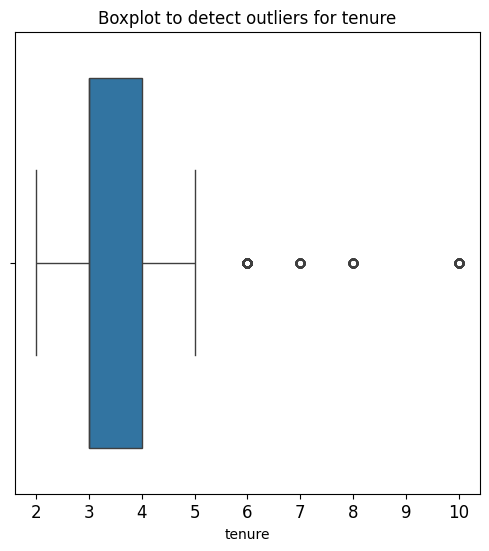

In [81]:
# Checking for Outliers in the data. Outliers are defined as a single data point that goes far outside the average value of a group of statistics
plt.figure(figsize=(6, 6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [82]:
# Determining the number of rows containing outliers

# Computing the 25th percentile value in tenure
percentile25 = df1['tenure'].quantile(0.25)

# Computing the 75th percentile value in tenure
percentile75 = df1['tenure'].quantile(0.75)

# Computing the interquartile range in tenure
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit values for non-outlier values in 'tenure'
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print("Lower limit: ", lower_limit)
print("Upper limit: ", upper_limit)

# Identifying the subset of the data that contains outliers in tenure column
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Counting the number of rows that contain outliers in tenure
print("Number of rows in the dataset containing outliers in 'tenure' column: ", len(outliers))

Lower limit:  1.5
Upper limit:  5.5
Number of rows in the dataset containing outliers in 'tenure' column:  824


In [83]:
# Understanding data in-depth 
# Getting the number of people who left and stayed
print(df1['left'].value_counts())
print()

# Getting the percentage of people who left and stayed
print(df['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64


Data Visualization

The best way to understand relationships between features is through visualizing the data.
One can visualize the data by using the appropriate library in Python, or by using Business Intelligence tools such as Microsoft Power BI, Tableau

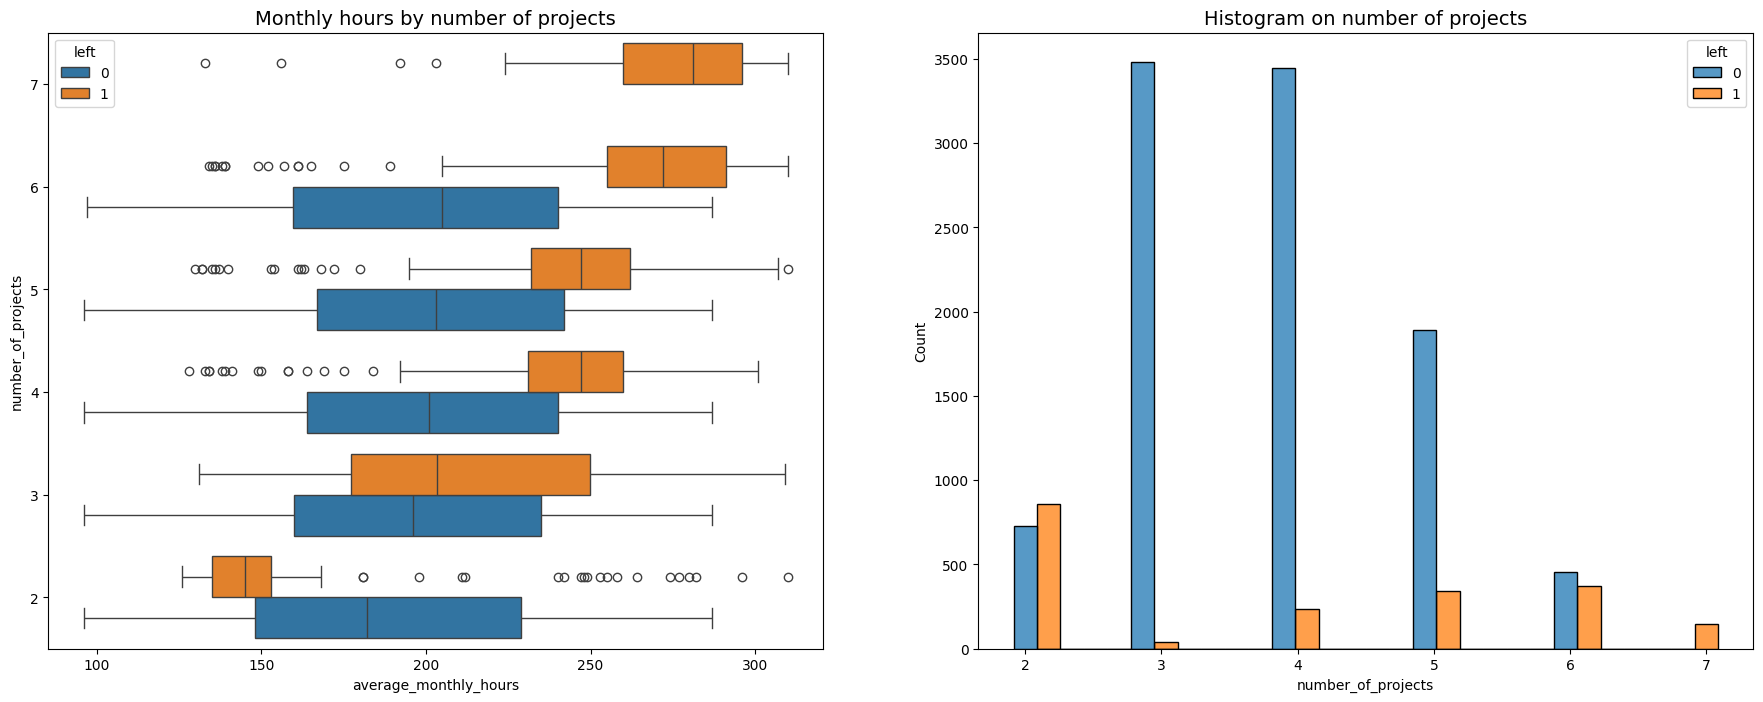

In [84]:
# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Creating a boxplot to show 'average_monthly_hours' distributions for 'number_of_projects'
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating a histogram to show distribution of 'number_of_project', comparing employee who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_of_projects']
tenure_left = df1[df1['left']==1]['number_of_projects']
sns.histplot(data=df1, x='number_of_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Histogram on number of projects', fontsize='14')

# Displaying the plots
plt.show()

Text(0.5, 1.0, 'Monthly hours by satisfaction score')

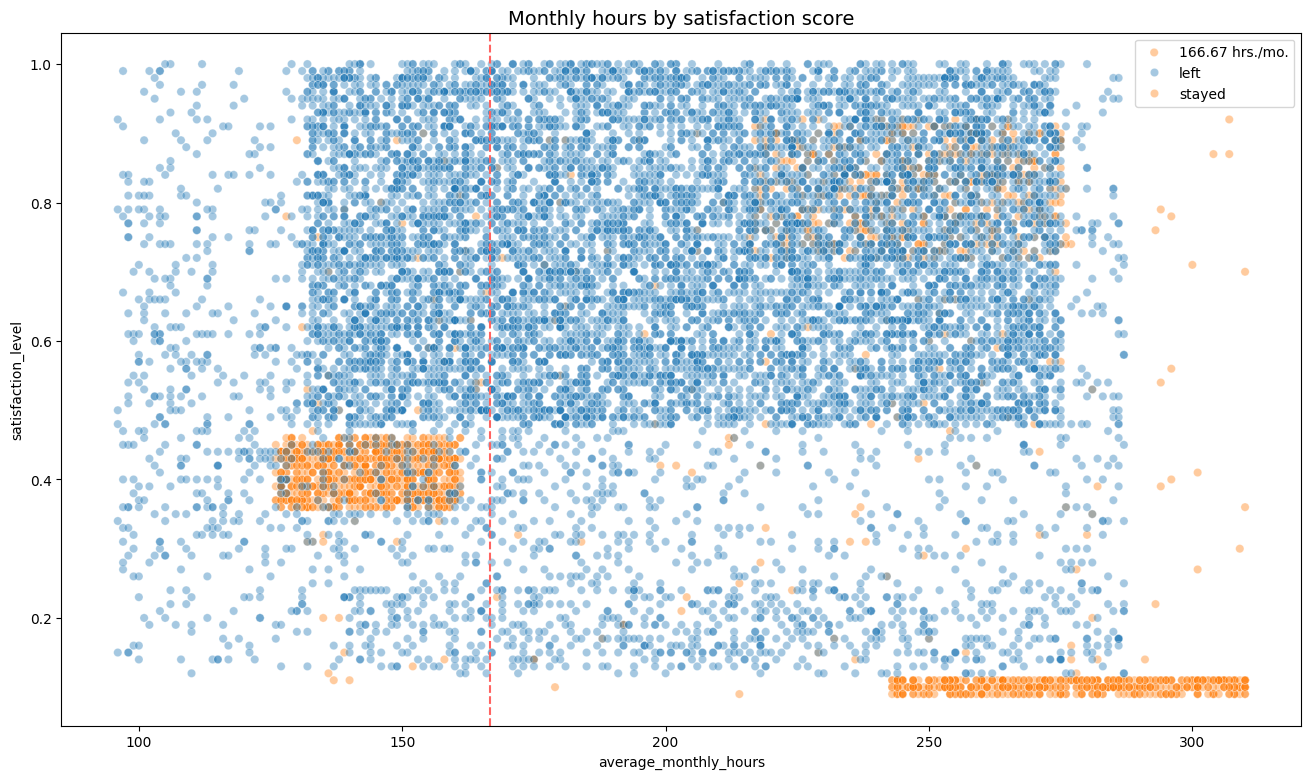

In [85]:
# Creating a scatter plot of 'average_monthly_hours' versus 'satisfaction_level' for employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction score', fontsize='14')

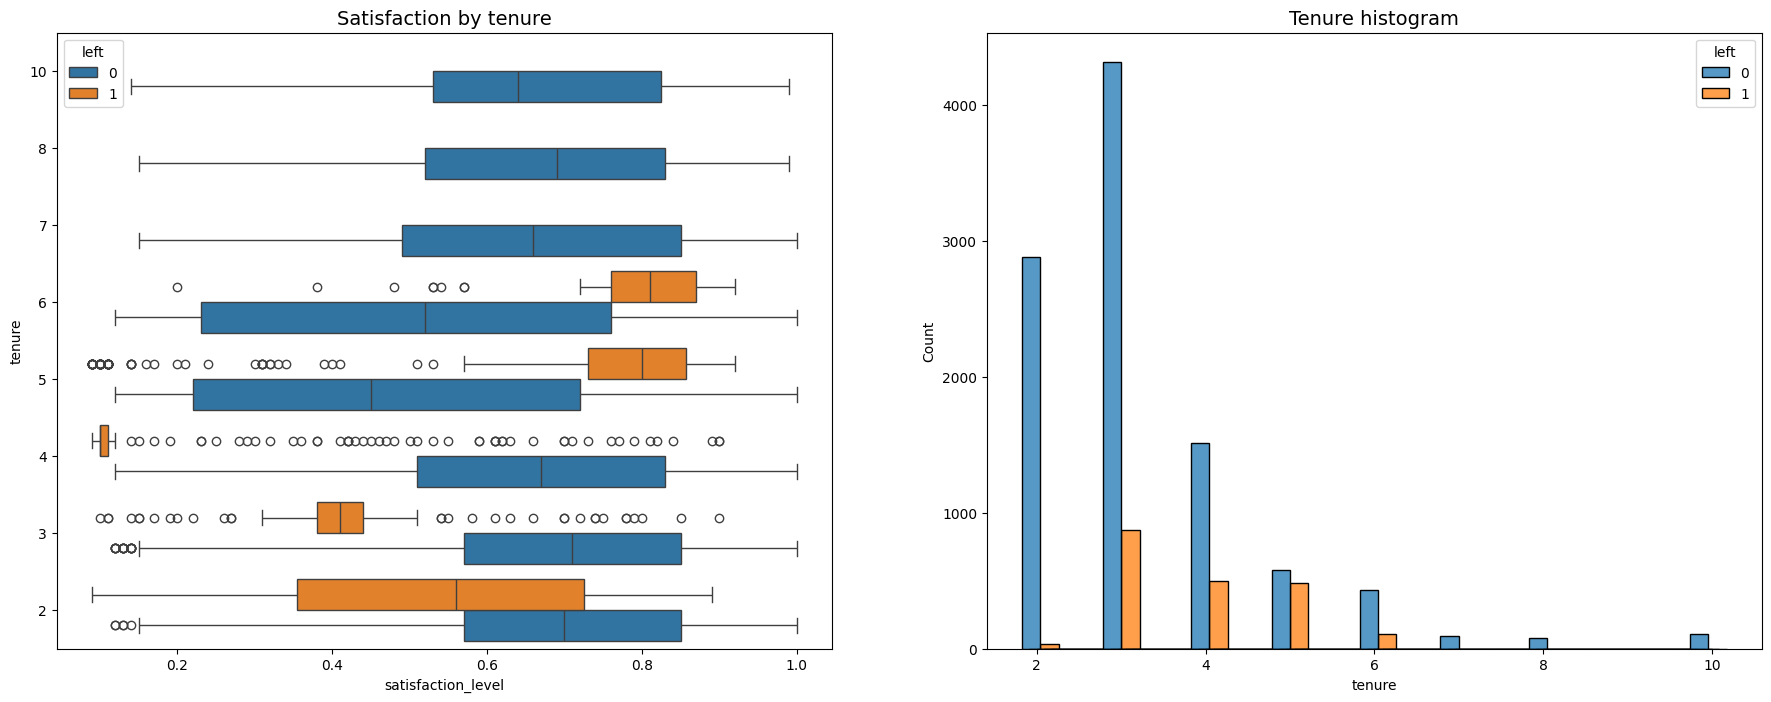

In [86]:
# Setting figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Creating a boxplot showing distributions of 'satisfaction_level' by tenure, comparing employees who stayed vs those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Creating a histogram to show distribution of 'tenure', comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show()

In [87]:
# Calculating the mean and median scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

C:\Users\User\AppData\Local\Temp\ipykernel_14268\1977548912.py:2: FutureWarning: The provided callable <function mean at 0x00000214F061C180> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
C:\Users\User\AppData\Local\Temp\ipykernel_14268\1977548912.py:2: FutureWarning: The provided callable <function median at 0x00000214F0754900> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

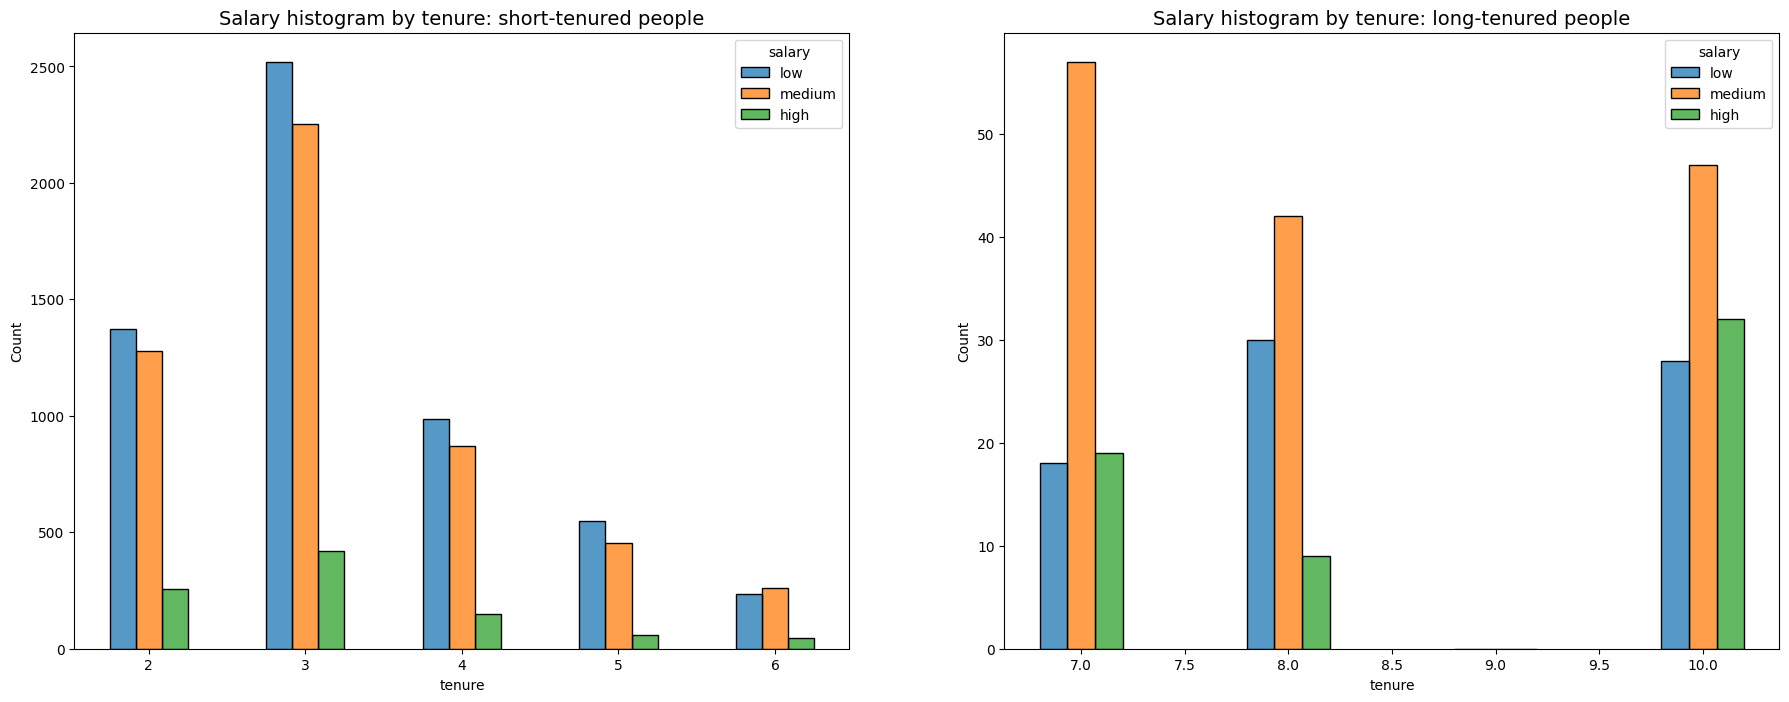

In [88]:
# Examining salary levels for different tenures

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Defining short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Defining long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plotting short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plotting long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

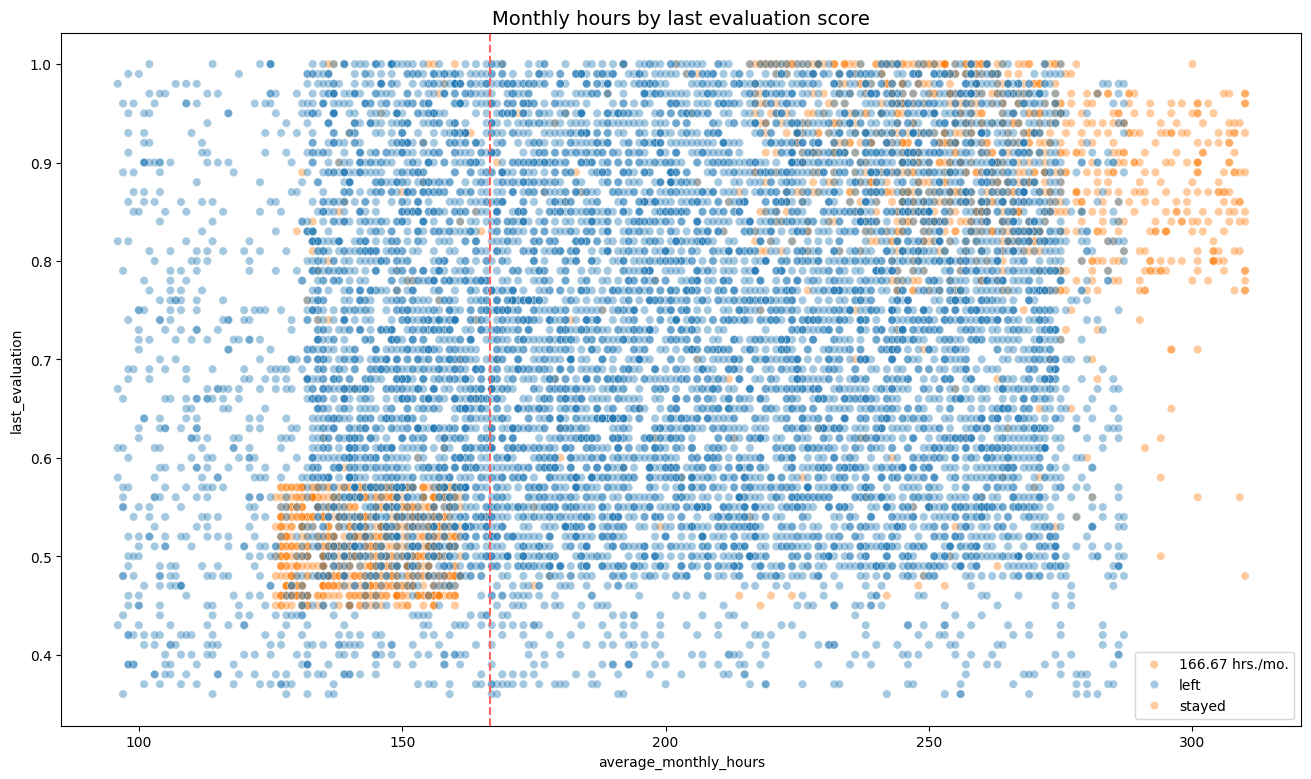

In [89]:
# Creating a scatter plot of 'average_monthly_hours' versus 'last_evaluation' for employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14')

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

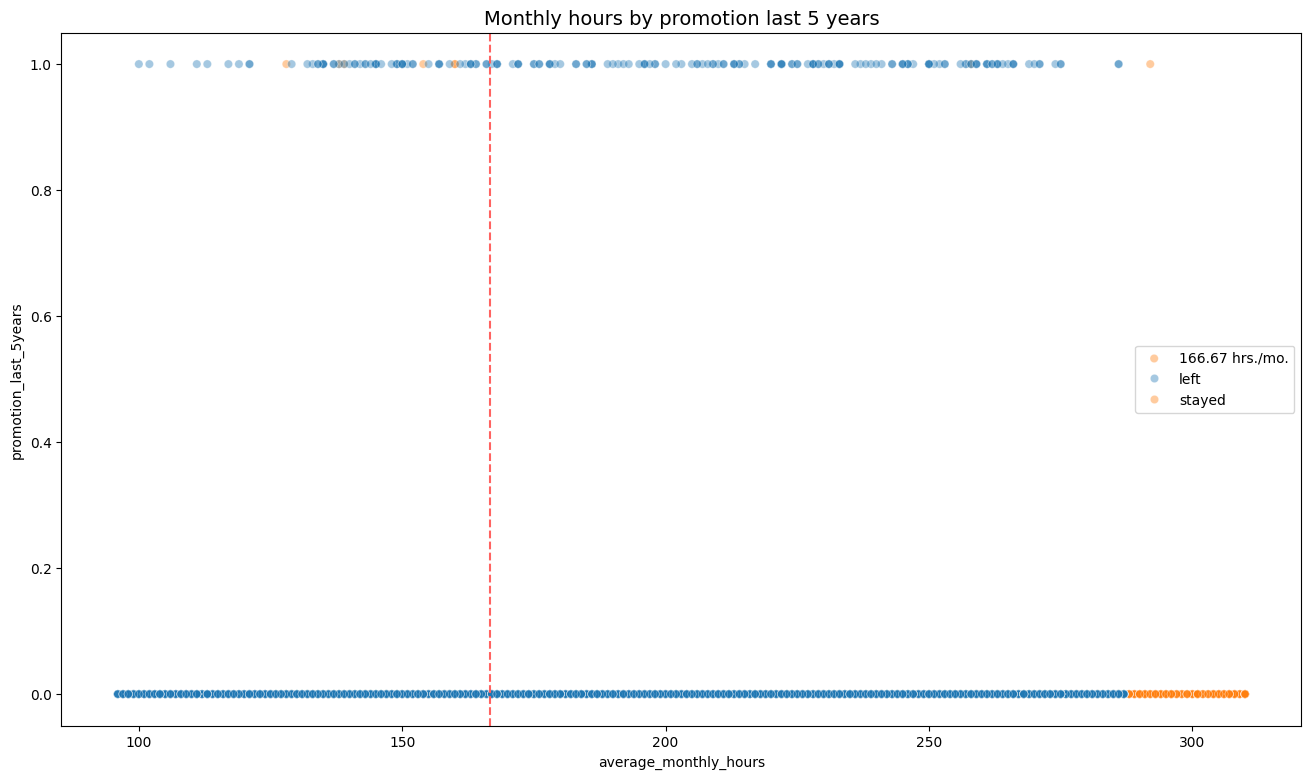

In [90]:
# Creating a scatter plot to check if employees who worked for long hours were promoted in the last 5 years for employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

Text(0.5, 1.0, 'Counts of stayed/left by department')

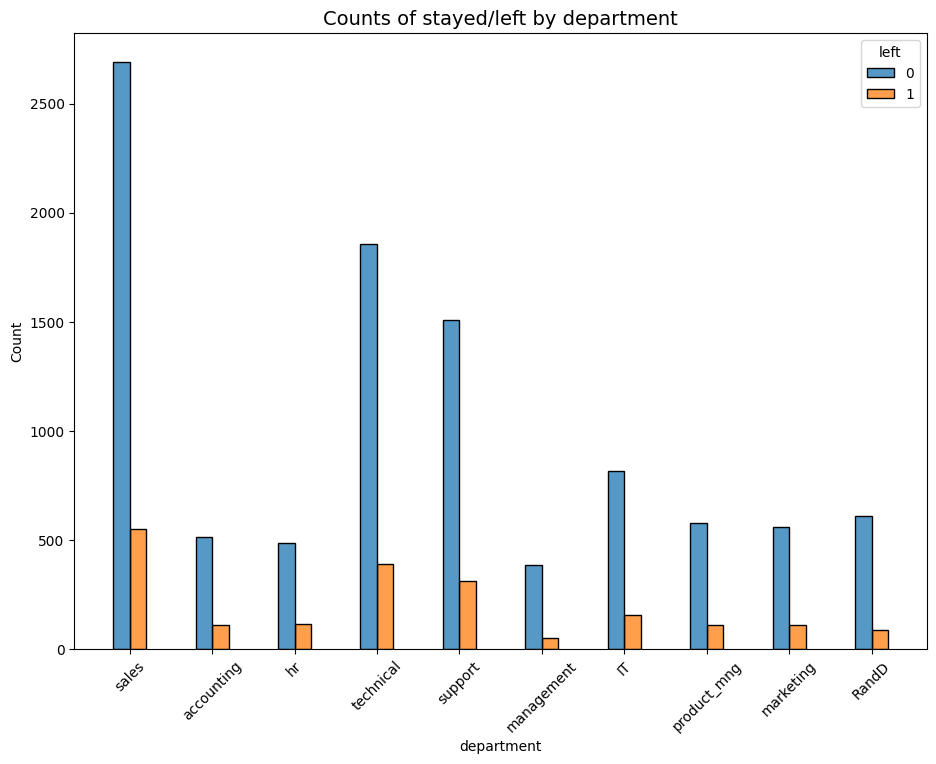

In [91]:
# Plotting a histogram to compare department distribution of employees who left versus those who stayed
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.4)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize='14')

Text(0.5, 1.0, 'Correlation Heatmap')

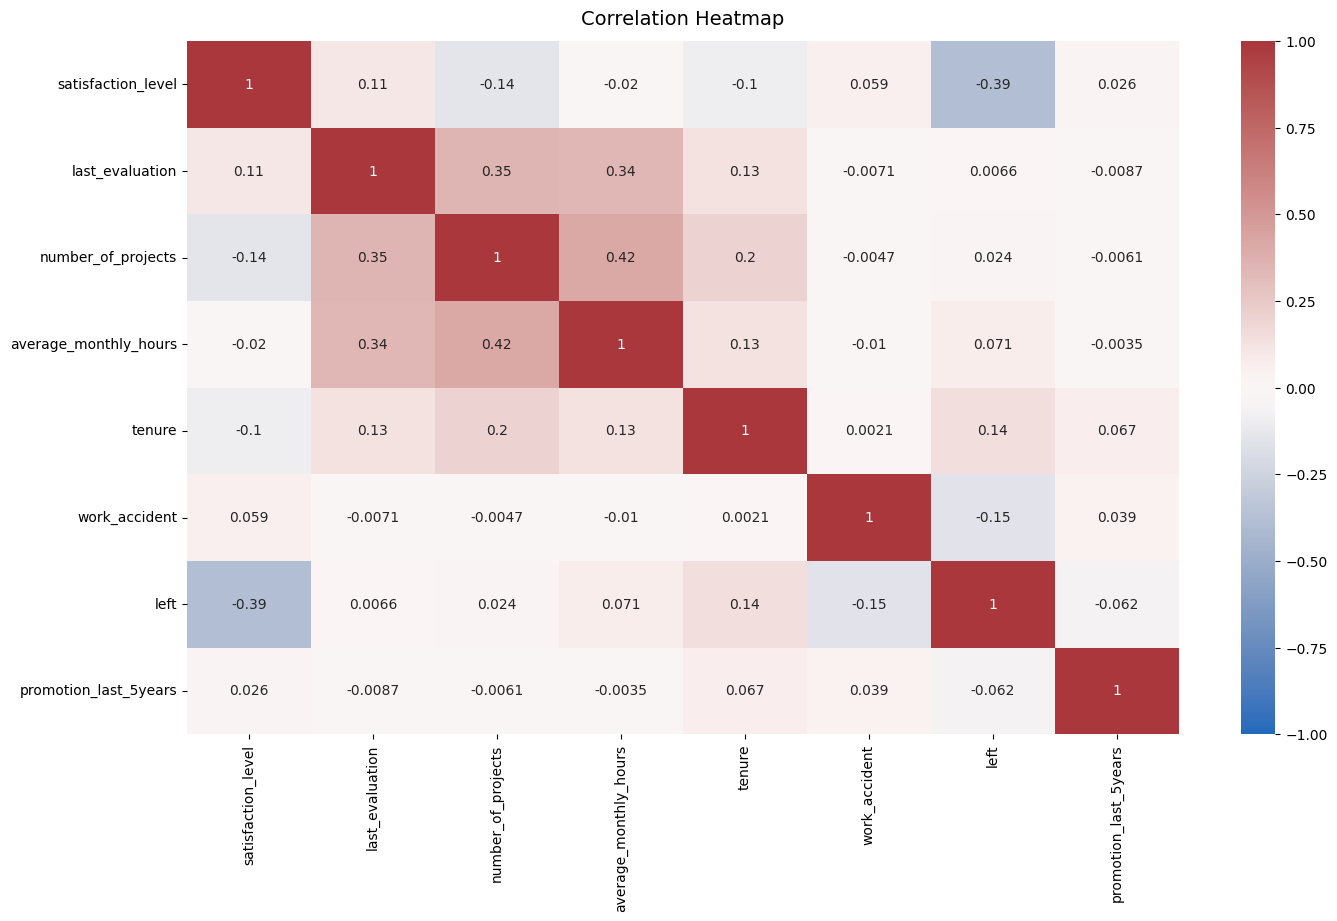

In [92]:
# Creating a heatmap to find correlation between variables in the data
# Note that only columns of numeric data type can be used to create a heat map. Hence, specifying the columns to consider to plot the heat map
heatmap_columns = ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'tenure', 'work_accident', 'left', 'promotion_last_5years']
subset_df1 = df[heatmap_columns]
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(subset_df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

Model Building

Logistic Regression
The goal of the machine learning model is to predict whether an employee will stay or leave the company based on multiple independent variables listed.
SInce, the prediction variable is categorical in nature, we will be building a Logistic Regression model, a binomial logistic regression in specific.

In [93]:
# Encoding the non-numeric variables, department and salary
# Copying the dataframe
df_enc = df1.copy()

# Encoding the 'salary' column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encoding the 'department' column
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


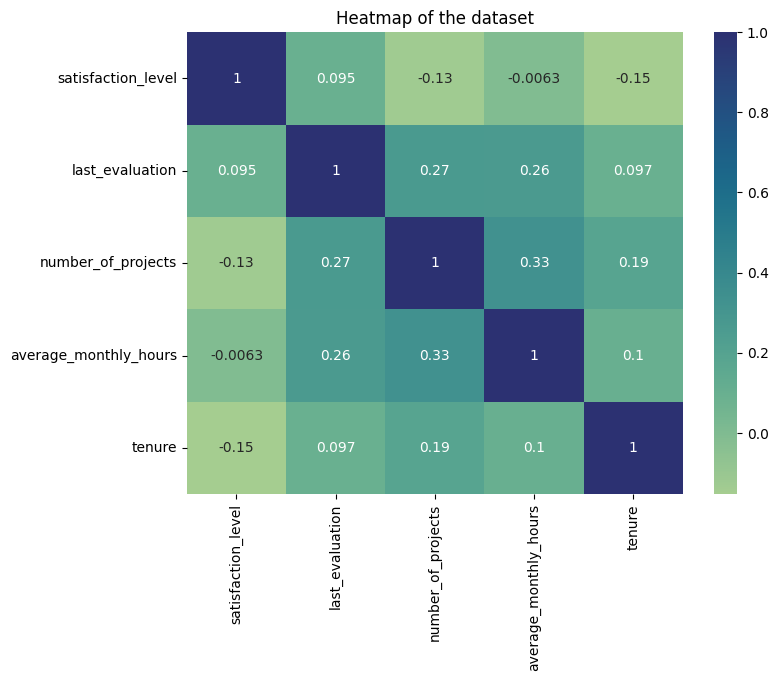

In [94]:
# Creating a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

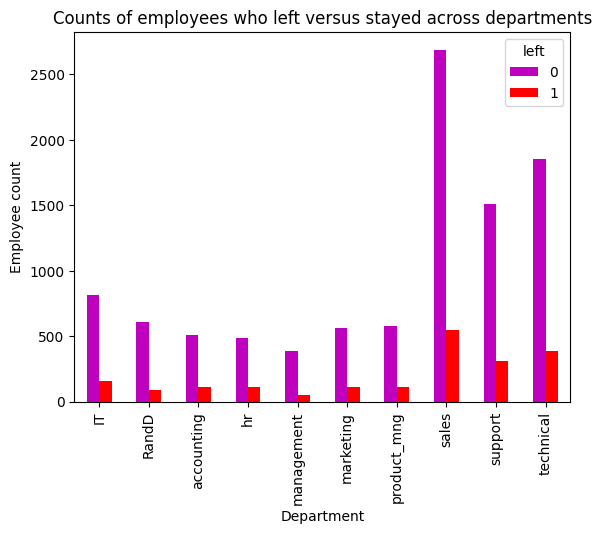

In [95]:
# Creating a stacked bar plot to visualize the number of employees across department comparing those who left with those who didn't 
# 1 - represents employees who left, 0 - represents employees who stayed
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left versus stayed across departments')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [96]:
# Since logistic regression is sensitive to outliers, removing the outliers identified earlier in the tenure column 
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

In [97]:
# Isolating the outcome/predictor variable
y = df_logreg['left']

# Displaying the first few rows of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [98]:
# Selecting the features to be used in the model
X = df_logreg.drop('left', axis=1)

# Displaying the first few rows of the selected features
X.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [99]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [100]:
# Constructing a logistic regression model and fitting it into the training set
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [101]:
# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Results and Evaluation

Logistic Regression model can be evaluated by the metrics of precision, recall, f1-score, and support

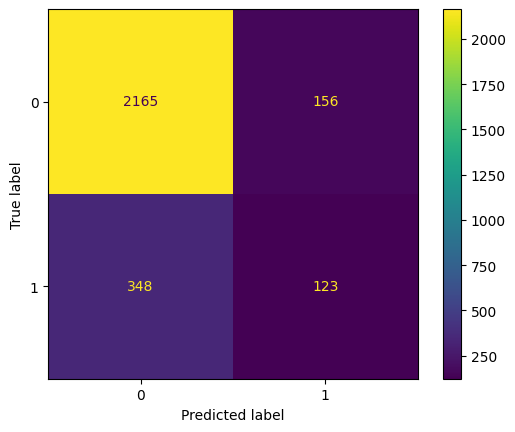

In [102]:
# Creating a confusion matrix to visualize the results of the logistic regression model
# The upper-left quadrant displays the number of true negatives. 
# The upper-right quadrant displays the number of false positives. 
# The bottom-left quadrant displays the number of false negatives. 
# The bottom-right quadrant displays the number of true positives.
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating a display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plotting the confusion matrix
log_disp.plot(values_format='')

plt.show()

In [103]:
# Checking for imbalances in the dataset
df_logreg['left'].value_counts(normalize=True) # With 83-17% split, we can conclude that there is not much class imbalance

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [104]:
# Creating classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

# The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. 
# However, if it's most important to predict employees who leave, then the scores are significantly lower.

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792

